In [2]:
"""
This is a temporary script file.
Resources:
    https://www.tutorialspoint.com/matplotlib/matplotlib_axes_class.htm

"""

import pandas as pd
import matplotlib


'''DESIRED CHART:
    -grouped bar chart
    -each group represents a time period (weekdays, weekends, etc)
    -each bar series represents a year
    -title is the project description + direction
    -will have separate, side-by-side charts, 1 chart for each direction
    -bars will have data labels showing their values
    
'''

# =============PREPARATION STEPS

# import sample data
in_csv = r'/Users/darrenconly/PythonProjects/CodeSnippets/DataViz/py_matplotlib/sample_data_csvs/speed_data_x_project.csv'
df = pd.read_csv(in_csv)


# column names: 'measure_full', 'value', 'proj_desc', 'proj_inum', 'data_year', 'direction', 'measure'

# filter to only one test project

proj = df['proj_desc'][0]
direcn = df['direction'][0]

dfp = df.loc[(df['proj_desc'] == proj) & (df['direction'] == direcn) \
             & df['measure'].str.contains('lottr')]
    


chart_title = f'{proj} - {direcn}'

In [ ]:
# ===========METHOD 1: BUILD THE CHART USING PANDAS PLOTTING==========
'''Advantages to using Pandas plotting:
    -simple, fewer lines of code
Disadvangates:
'''
#set up the initial matplotlib axes object 
ax = dfp.plot(title=chart_title)

# each year of data will be a series of bars
for i in [2016, 2019]:
    dfi = dfp.loc[dfp['data_year'] == i]
    ax.bar(x='measure', height='value')

In [15]:
dfi = dfp.loc[dfp['data_year'] == 2016]
dfj = dfp.loc[dfp['data_year'] == 2019]

print(dfi)
print(dfj)

   Unnamed: 0         measure_full     value                      proj_desc  \
3           3  EASTBOUNDlottr_ampk  1.294696  Richards Blvd- I-5 to 16th St   
4           4    EASTBOUNDlottr_md  1.294705  Richards Blvd- I-5 to 16th St   
5           5  EASTBOUNDlottr_pmpk  1.396554  Richards Blvd- I-5 to 16th St   
6           6  EASTBOUNDlottr_wknd  1.349272  Richards Blvd- I-5 to 16th St   

   proj_inum  data_year  direction     measure  
3          1       2016  EASTBOUND  lottr_ampk  
4          1       2016  EASTBOUND    lottr_md  
5          1       2016  EASTBOUND  lottr_pmpk  
6          1       2016  EASTBOUND  lottr_wknd  
     Unnamed: 0         measure_full     value                      proj_desc  \
255           3  EASTBOUNDlottr_ampk  1.345554  Richards Blvd- I-5 to 16th St   
256           4    EASTBOUNDlottr_md  1.343295  Richards Blvd- I-5 to 16th St   
257           5  EASTBOUNDlottr_pmpk  1.579484  Richards Blvd- I-5 to 16th St   
258           6  EASTBOUNDlottr_wkn

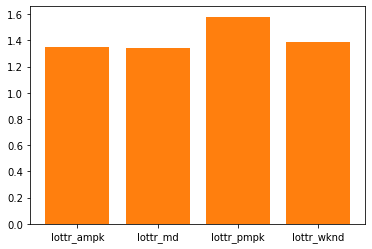

In [10]:
# ===========METHOD 2: BUILD THE CHART USING ONLY MATPLOTLIB INLINE plot() ==========
# pyplot is the inline way of plotting; ax is the object-oriented way of plotting
# plt can be shown inline with plt.show() command
# https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html

import matplotlib.pyplot as plt


# The Figure is like a canvas, and the Axes is a part of that canvas on 
# which we will make a particular visualization.
fig, ax = plt.subplots()

# for i in [2016, 2019]:
#     dfi = dfp.loc[dfp['data_year'] == i]
#     ax.bar(dfi['measure'], dfi['value'])

dfi = dfp.loc[dfp['data_year'] == 2016]
dfj = dfp.loc[dfp['data_year'] == 2019]

s1 = ax.bar(dfi['measure'], dfi['value'])
s2 = ax.bar(dfj['measure'], dfj['value'])

plt.show()

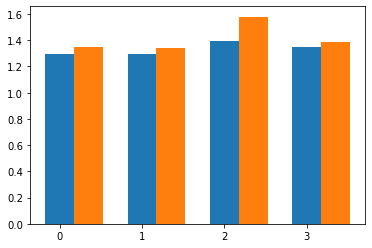

In [25]:
# ===========METHOD 2: BUILD THE CHART USING ONLY MATPLOTLIB INLINE plot() ==========
# pyplot is the inline way of plotting; ax is the object-oriented way of plotting
# plt can be shown inline with plt.show() command
# https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html

import matplotlib.pyplot as plt


# The Figure is like a canvas, and the Axes is a part of that canvas on 
# which we will make a particular visualization.
fig, ax = plt.subplots()

# for i in [2016, 2019]:
#     dfi = dfp.loc[dfp['data_year'] == i]
#     ax.bar(dfi['measure'], dfi['value'])

dfi = dfp.loc[dfp['data_year'] == 2016]
dfj = dfp.loc[dfp['data_year'] == 2019]

x_locns = [i for i, v in enumerate(dfi['measure'])]

bar_width = 0.35

plt.bar(x_locns, dfi['value'], bar_width)
plt.bar([i + bar_width for i in x_locns], dfj['value'], bar_width)

ax.set_xticks(x_locns)

plt.show()

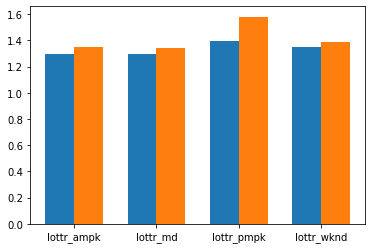

In [55]:
# ===========METHOD 2: BUILD THE CHART USING ONLY MATPLOTLIB INLINE plot() ==========
# pyplot is the inline way of plotting; ax is the object-oriented way of plotting
# plt can be shown inline with plt.show() command
# https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html

import matplotlib.pyplot as plt


# The Figure is like a canvas, and the Axes is a part of that canvas on 
# which we will make a particular visualization.
fig, ax = plt.subplots()

# set the width of each bar
bar_width = 0.35

# the values that will be shown for each tick mark on the x axis
x_label_vals = dfp['measure'].unique()
x_labels = ax.set_xticklabels(x_label_vals)

# the distance along the x axis at which the x-axis label will be placed
x_label_posns = [i + (bar_width/2) for i, v in enumerate(x_label_vals)]
ax.set_xticks(x_label_posns)

# these values will be a different color on the bar chart
data_series = dfp['data_year'].unique()

for x_posn, year in enumerate(data_series):
    
    # make sure each color in the series is visible and right next
    # to the previous color, immediatly to the right
    adder = x_posn * bar_width
    x_locns = [i + adder for i, v in enumerate(dfi['measure'])]
    
    # add the values for that series to the bar chart
    dfi = dfp.loc[dfp['data_year'] == year]
    ax.bar(x_locns, dfi['value'], bar_width)



plt.show()